### A Simulation of Queuing System

Simulation of a `M/G/n` queuing system, `G` is uniform distribution in this example

In [1]:
import numpy as np
import pandas as pd

class Clinic(object):
    """
    This is a simulation module of clinic system
    
    @param total_minutes, numeric
      operation time in minutes, e.g. 9:00 AM -> 4:00 PM we should input 420
    @param enqueue_rate, numeric
      parameter of Possion process, time interval among patients ~ Exp(enqueue_rate)
    @param num_doctors, integer
      number of doctors 
    @param waiting_time_interval, list with length 2
      parameter of Uniform distribution for service time
    @param num_inplace, integer
      number of patients in service, in (0, num_doctors]
    @param idx_inplace, list with length less than or equal to num_doctors
      index of patients in service, 
    """
    
    def __init__(self, total_minutes, enqueue_rate, num_doctors, waiting_time_interval):
        self.total_minutes = total_minutes
        self.enqueue_rate = enqueue_rate
        self.num_doctors = num_doctors
        self.waiting_time_interval = waiting_time_interval
        self.num_inplace = 0
        self.idx_inplace = []
    
    def run(self, seed = 1):
        np.random.seed(seed)
        patients_count, arrival_timestamp = 0, [0]
        arrival_interval, service_time, waiting_time, leave_time = [], [], [], []
        
        while arrival_timestamp[-1] <= self.total_minutes:
            arrival_interval.append(np.random.exponential(self.enqueue_rate))
            arrival_timestamp = np.cumsum(arrival_interval)
            service_time.append(np.random.uniform(self.waiting_time_interval[0], 
                                                  self.waiting_time_interval[1]))
            
            # if the number of patients in service is less than number of doctors 
            # there will be no need for waiting
            if self.num_inplace < self.num_doctors:
                self.num_inplace += 1
                self.idx_inplace.append(patients_count)
                leave_time.append(arrival_timestamp[-1] + service_time[-1])
                waiting_time.append(0)
            else:
                # find the minimum leave time for all patients in service and "remove" it from system
                leave_idx = self.idx_inplace[np.argmin([leave_time[i] for i in self.idx_inplace])]
                
                # waiting time should be greater than or equal to 0
                waiting_time.append(np.max([leave_time[leave_idx] - arrival_timestamp[-1], 0]))
                self.idx_inplace.remove(leave_idx)
                self.idx_inplace.append(patients_count)
                leave_time.append(arrival_timestamp[-1] + waiting_time[-1] + service_time[-1])
            
            patients_count += 1
        
        if arrival_timestamp[-1] > self.total_minutes:
            arrival_timestamp = arrival_timestamp[:-1]
            arrival_interval = arrival_interval[:-1]
            service_time = service_time[:-1]
            leave_time = leave_time[:-1]
            waiting_time = waiting_time[:-1]
        
        last_arrival = arrival_timestamp[-1]
        if leave_time[-1] > 420:
            close_time = leave_time[-1]
        else:
            close_time = 420.0
        
        summary = {
            'patients_count': patients_count,
            'close_time': close_time,
            'service_time': service_time,
            'arrival_interval': arrival_interval,
            'arrival_timestamp': arrival_timestamp,
            'leave_time': leave_time,
            'waiting_time': waiting_time,
            'close_time': '{}:{} PM'.format(int(close_time / 60) - 3, 
                                            int(close_time - 60 * int(close_time / 60))),
            'close_time_minutes': close_time
        }
        
        return summary

In [2]:
# build a queue 
clinic = Clinic(420, 10, 3, [5, 20])

In [3]:
# running simulation and return summary
summary = clinic.run(seed = 1)

In [4]:
summary['close_time']

'4:12 PM'

In [5]:
summary_df = pd.DataFrame(np.stack((summary['arrival_interval'], summary['service_time'],
                                   summary['arrival_timestamp'], summary['leave_time'],
                                   summary['waiting_time']), axis = -1),
                         columns = ['arrival_interval', 'service_time', 'arrival_timestamp',
                                   'leave_timestamp', 'waiting_time'])
summary_df.iloc[:-1, :]

,arrival_interval,service_time,arrival_timestamp,leave_timestamp,waiting_time
0,5.396058,15.804867,5.396058,21.200926,0.000000
1,0.001144,9.534989,5.397202,14.932191,0.000000
2,1.587096,6.385079,6.984298,13.369377,0.000000
3,2.061146,10.183411,9.045444,23.552788,4.323933
4,5.054525,13.082251,14.099970,28.014442,0.832221
5,5.433394,15.278293,19.533364,36.479218,1.667562
6,2.287244,18.171762,21.820608,41.724550,1.732180
7,0.277696,15.057013,22.098304,43.071454,5.916138
8,5.400910,13.380347,27.499214,49.859566,8.980004
9,1.512729,7.971522,29.011944,49.696072,12.712606


In [6]:
summary_df.iloc[:, 0].mean()

8.890027612171897

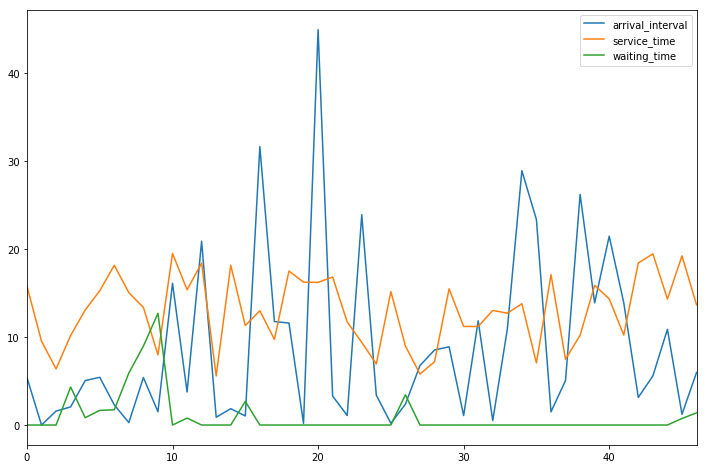

In [21]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 8)
import matplotlib.pyplot as plt
summary_df[['arrival_interval', 'service_time', 'waiting_time']].plot()
plt.show()

#### Problem (a)

Simulate the process once. How many patients came to the office? How many had to wait for a doctor? What was their average wait? When did the office close?

In [8]:
clinic_onerun = Clinic(420, 10, 3, [5, 20])

In [9]:
summary = clinic_onerun.run(seed = 1)

In [10]:
print('Number of patients came to the office is: {}'.format(summary['patients_count']))

Number of patients came to the office is: 48


In [11]:
print('Number of patients that had to wait for a doctor: {}'.format(np.sum(np.array(summary['waiting_time']) > 0)))

Number of patients that had to wait for a doctor: 12


In [12]:
print('Average waiting time in minutes is: {}'.format(np.mean(summary['waiting_time'])))

Average waiting time in minutes is: 0.961963402327


In [13]:
print('Close time of office: {}'.format(summary['close_time']))

Close time of office: 4:12 PM


#### Problem (b)

Simulate the process 100 times and estimate the median and 50% interval for each of the summaries

In [14]:
num_patients, num_wait_patients, avg_wait_time, close_time_minutes = [ ], [ ], [ ], [ ]
for i in np.arange(100):
    summary = Clinic(420, 10, 3, [5, 20]).run(seed = i)
    num_patients.append(summary['patients_count'])
    num_wait_patients.append(np.sum(np.array(summary['waiting_time']) > 0))
    avg_wait_time.append(np.mean(summary['waiting_time']))
    close_time_minutes.append(summary['close_time_minutes'])

In [15]:
summary_100run = pd.DataFrame(np.stack((num_patients, num_wait_patients, avg_wait_time, close_time_minutes), axis = -1),
                             columns = ['num_patients', 'num_wait_patients', 'avg_wait_time', 'close_time_minutes'])
summary_100run.head(10)

,num_patients,num_wait_patients,avg_wait_time,close_time_minutes
0,37.0,7.0,1.199666,420.000000
1,48.0,12.0,0.961963,432.894331
2,41.0,2.0,0.006552,421.875441
3,49.0,12.0,0.728870,433.078914
4,35.0,4.0,0.737557,422.351846
5,41.0,3.0,0.102811,420.000000
6,42.0,2.0,0.140763,420.000000
7,45.0,5.0,0.197129,432.523653
8,45.0,10.0,1.853345,429.543703
9,34.0,1.0,0.004673,425.338942


In [16]:
print('Median: \n{}'.format(summary_100run.median()))

Median: 
num_patients           42.000000
num_wait_patients       5.000000
avg_wait_time           0.465127
close_time_minutes    425.589964
dtype: float64


In [17]:
summary_100run.apply(lambda x: x.quantile([.25, .75]))

,num_patients,num_wait_patients,avg_wait_time,close_time_minutes
0.25,38.0,3.00,0.213228,420.000000
0.75,47.0,8.25,0.801961,430.960859


In [18]:
print('50% interval for number of patients: [{}, {}]'.format(38, 47))
print('50% interval for number of patients who have to wait: [{}, {}]'.format(3, 8.25))
print('50% interval for average waiting time (in minutes): [{}, {}]'.format(0.21, 0.80))

50% interval for number of patients: [38, 47]
50% interval for number of patients who have to wait: [3, 8.25]
50% interval for average waiting time (in minutes): [0.21, 0.8]


In [19]:
# convert close_time_minutes to real time format
def convert_minute2time(minutes):
    return '{}:{} PM'.format(int(minutes / 60) - 3, int(minutes - 60 * int(minutes / 60)))

print('50% interval for closing time: [{}, {}]'.format(convert_minute2time(420), convert_minute2time(430.96)))

50% interval for closing time: [4:0 PM, 4:10 PM]
